# 支持向量机原理

**支持向量机（Support Vector Machine, SVM）**是一种监督学习算法，既可用于分类任务，又可用于回归任务（即支持向量回归，SVR）。
支持向量机的核心思想是找到一个最优超平面，将不同类别的样本分开，并使得两类样本到该超平面的间隔（Margin）最大化。

## 核心概念

- **超平面（Hyperplane）**：在高维空间中分割数据的决策边界。对于二维数据，超平面是一条直线；三维数据则是一个平面。
- **支持向量（Support Vectors）**：距离超平面最近的样本点，这些点决定了超平面的位置和方向。
- **间隔（Margin）**：支持向量到超平面的最短距离之和，最大化间隔可提高模型鲁棒性。

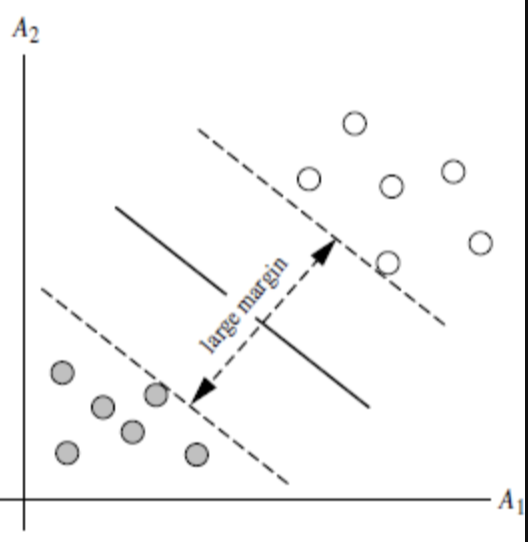

In [1]:
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C20 机器学习模型——支持向量机模型.png', width=300, height=200)

## 数学公式推导

- **目标函数**：寻找超平面$w \cdot x + b = 0$，使得间隔最大化。
$$\text{最大化} \quad \frac{2}{\|w\|}, \quad \text{约束条件} \quad y_i(w \cdot x_i + b) \geq 1 \quad (i=1,2,...,n)$$
- **优化问题**：通过拉格朗日乘数法转化为对偶问题：
$$\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i \cdot x_j$$
$$\text{约束条件} \quad \alpha_i \geq 0, \quad \sum_{i=1}^n \alpha_i y_i = 0$$
  其中，$\alpha_i$是拉格朗日乘子，非零的$\alpha_i$对应支持向量。

## 核函数（Kernel function）
- **问题背景**：支持向量机中的超平面是一个线性边界，但是当数据线性不可分时，则无法使用超平面较好地分割。
- **解决方案**：使用核函数将数据映射到高维空间，从而使其线性可分。
- **常用核函数**：
  - **线性核**：$K(x_i, x_j) = x_i \cdot x_j$
  - **多项式核**：$K(x_i, x_j) = (x_i \cdot x_j + c)^d$
  - **高斯核（RBF）**：$K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
  - **Sigmoid核**：$K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + c)$

## 软间隔（Soft Margin）
- **问题背景**：数据中存在噪声或异常点时，严格间隔可能导致过拟合。
- **解决方案**：引入松弛变量$\xi_i$，允许部分样本违反间隔约束。
$$\text{目标函数} \quad \min_{w,b,\xi} \frac{1}{2}\|w\|^2 + \frac{1}{C} \sum_{i=1}^n \xi_i$$
$$\text{约束条件} \quad y_i(w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$
其中，$C$是正则化参数，控制对误分类的惩罚力度。正则化的强度与$C$成反比，即$C$值越小，正则化越强。

# 优缺点分析
## SVM模型优点
- **高维处理能力**：SVM通过核技巧能够有效地处理高维数据集
- **避免局部最优**：由于SVM的优化问题是凸优化问题，因此解是全局最优解，不会陷入局部最小值
- **稳健性**：SVM对于数据中的噪声和异常值具有较好的鲁棒性，因为它只关心支持向量，而不是整个数据集。
- **小样本学习**：SVM在小样本情况下也能表现良好，适合样本量较小的问题。
- **模型解释性**：SVM的决策边界由支持向量定义，这使得模型相对容易解释。

## SVM模型缺点
- **对大规模数据集难以实施**：SVM算法对大规模训练样本难以实施，因为其计算复杂度较高。
- **多分类问题处理困难**：用SVM解决多分类问题存在困难，需要一些特殊的策略如一对多（OvR）或一对一（OvO）。
- **对缺失数据敏感**：SVM对缺失数据敏感，对参数和核函数的选择敏感。

# 分类问题——支持向量机分类SVC

## SVC
  - `C`: 正则化参数。较大的 C 值会尝试分类所有训练样本，而较小的 C 值会允许更多的误差。
  - `kernel`: 核函数类型
    - `linear`: 线性核（适用于线性可分数据，速度快）。
    - `poly`: 多项式核（通过 degree 控制多项式次数）。
    - `rbf`: 高斯径向基核（默认，适合非线性问题，需调 gamma）。
    - `sigmoid`: Sigmoid 核。
  - `degree`: 多项式核 poly 的阶数，仅当 kernel='poly' 时有效（默认 3）。
  - `probability`: 是否启用概率估计（默认 False）
      - True: 可调用 predict_proba() 方法（用于计算ROC曲线）。
      - False: 减少训练时间，但无法输出概率。
  - `class_weight`: 指定类别权重。可以用于处理不平衡数据集。
      - None: 所有类权重相等。
      - balanced: 自动根据类别频率调整权重（推荐用于不平衡数据）。
      - 自定义字典: 如 {0: 0.6, 1: 0.4} 指定类别权重。
  - `random_state`: 随机数种子，确保结果可复现。

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [2]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.svm import SVC   # 支持向量机模型
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc  # 用于计算准确率，混淆矩阵等
import matplotlib.pyplot as plt  # 用于绘制图表
import seaborn as sns  # 用于绘制更美观的图表

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

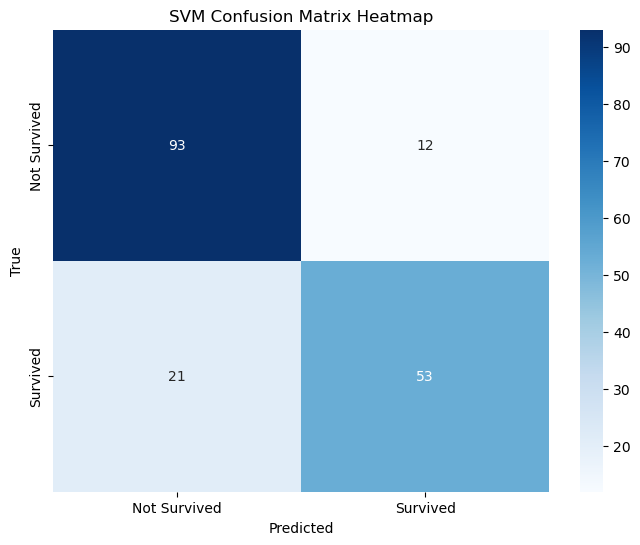

Classification Report:
              precision    recall  f1-score   support

           0     0.8158    0.8857    0.8493       105
           1     0.8154    0.7162    0.7626        74

    accuracy                         0.8156       179
   macro avg     0.8156    0.8010    0.8060       179
weighted avg     0.8156    0.8156    0.8135       179



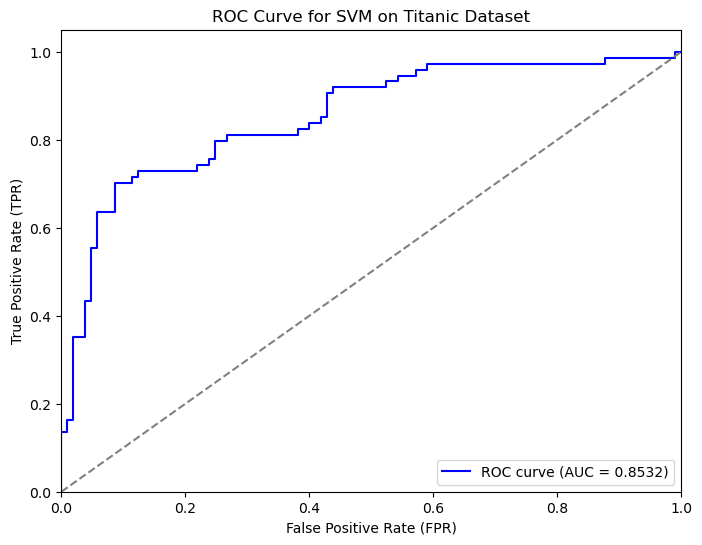

In [3]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
y = df['survived']

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化特征（SVM对特征尺度敏感！）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建并训练SVM模型（需设置probability=True以生成概率预测）
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)  # 使用RBF核
svm_model.fit(X_train_scaled, y_train)

# 进行预测
y_probs = svm_model.predict_proba(X_test_scaled)[:, 1]  # 获取生还概率
y_pred = svm_model.predict(X_test_scaled)  # 分类结果

# 混淆矩阵热力图
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])
plt.title("SVM Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 分类报告
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM on Titanic Dataset')
plt.legend(loc='lower right')
plt.show()

# 回归问题——支持向量机回归SVR

## SVR
  - `C`: 正则化参数。较大的 C 值会尝试分类所有训练样本，而较小的 C 值会允许更多的误差。
  - `kernel`: 核函数类型
    - `linear`: 线性核（适用于线性可分数据，速度快）。
    - `poly`: 多项式核（通过 degree 控制多项式次数）。
    - `rbf`: 高斯径向基核（默认，适合非线性问题，需调 gamma）。
    - `sigmoid`: Sigmoid 核。
  - `degree`: 多项式核 poly 的阶数，仅当 kernel='poly' 时有效（默认 3）。
  - `random_state`: 随机数种子，确保结果可复现。

## 波士顿房价数据集

**Boston Housing Dataset（波士顿房价数据集）**是一个回归数据集，该数据集包含506个样本，每个样本有13个特征，该数据集用于根据犯罪率、房屋房间数、空气污染等因素对波士顿地区的房价进行预测。

- MEDV：住房价格中位数（单位：千美元）
- CRIM：该镇的人均犯罪率
- ZN：住宅用地超过 25000 平方英尺的比例（%）
- INDUS：非零售商用土地比例（%）
- CHAS：是否靠近查尔斯河（1=是，0=否）
- NOX：一氧化氮浓度（空气污染指标，单位：ppm）
- RM：每栋住宅的平均房间数
- AGE：1940 年之前建成房屋的比例（%）
- DIS：到波士顿五个中心区域的加权距离
- RAD：距离高速公路的便利指数
- TAX：每 $10,000 资产的房产税率
- PTRATIO：城镇师生比例
- B：黑人比例指标
- LSTAT：低收入人群比例（%）

In [4]:
# 导入必要的库
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns  # 统计绘图库
from sklearn.datasets import fetch_openml  # 加载数据集
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.svm import SVR  # 支持向量回归
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 评估指标

# 加载波士顿房价数据集
# 该数据集包含506个样本，每个样本有13个特征，用于预测房价
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # 特征变量
y = boston.target  # 目标变量（房价）
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

## 代码实现

### 代码与运行结果

MSE: 13.2663
RMSE: 3.6423
MAE: 2.3585
MAPE: 12.69%
R² Score: 0.8191


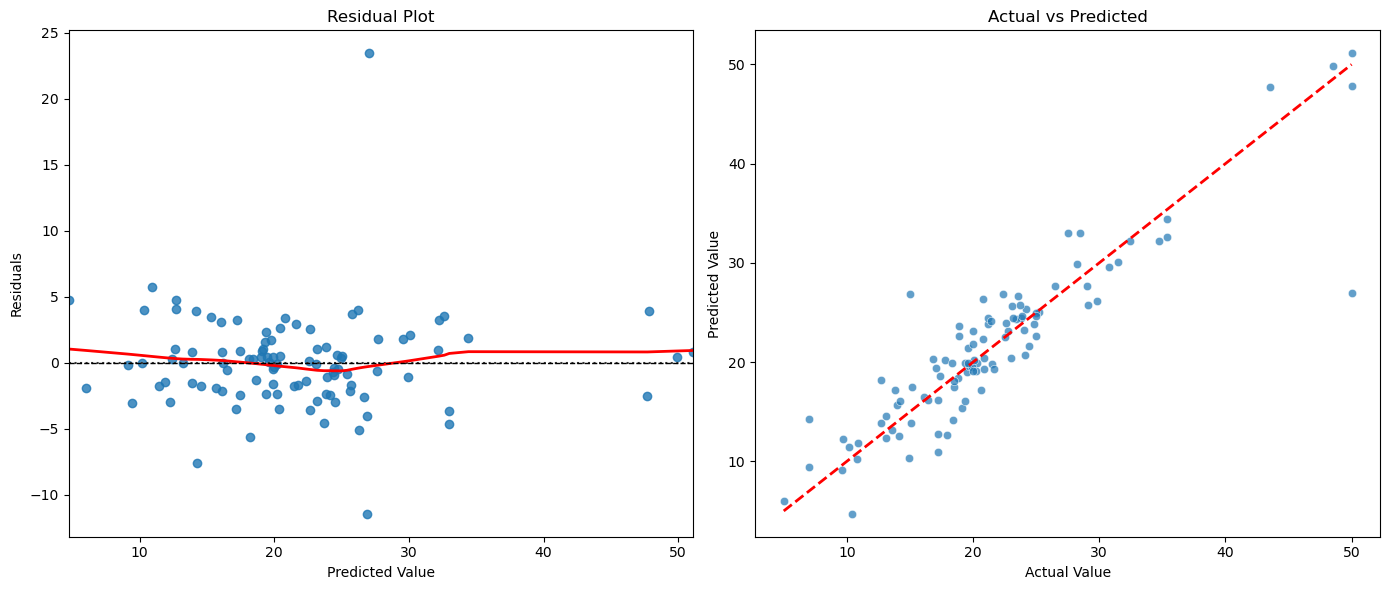

In [9]:
# SVR对数据尺度敏感，因此对特征 X 和目标值 y 进行标准化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)  # 标准化特征
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # 标准化目标变量

# 划分训练集和测试集，80% 训练集，20% 验证集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 定义支持向量回归 (SVR) 模型
svr = SVR(kernel='rbf', C=100)

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred_scaled = svr.predict(X_test)  # 预测的是标准化后的数据

# 逆变换回原始房价
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 计算评估指标
mse = mean_squared_error(y_test_original, y_pred_original)  # 均方误差 (MSE)
rmse = np.sqrt(mse)  # 均方根误差 (RMSE)
mae = mean_absolute_error(y_test_original, y_pred_original)  # 平均绝对误差 (MAE)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100  # 平均绝对百分比误差 (MAPE)
r2 = r2_score(y_test_original, y_pred_original)  # R² 评分（拟合优度）

# 输出评估指标
print(f"MSE: {mse:.4f}")  # 均方误差
print(f"RMSE: {rmse:.4f}")  # 均方根误差
print(f"MAE: {mae:.4f}")  # 平均绝对误差
print(f"MAPE: {mape:.2f}%")  # 平均绝对百分比误差
print(f"R² Score: {r2:.4f}")  # R² 评分

# 计算残差
residuals = y_test_original - y_pred_original  # 真实值 - 预测值

# 创建双子图
plt.figure(figsize=(14, 6))  # 设定图像大小 (14, 6)

# 残差图 (Residual Plot)
plt.subplot(1, 2, 1)  # 创建第一个子图
sns.residplot(x=y_pred_original, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})  # 低平滑线
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 添加 y=0 参考线
plt.xlabel("Predicted Value")  # 设置横轴标签
plt.ylabel("Residuals")  # 设置纵轴标签
plt.title("Residual Plot")  # 设置标题

# 实际值 vs 预测值图 (Actual vs Predicted Plot)
plt.subplot(1, 2, 2)  # 创建第二个子图
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.7)  # 真实值 vs 预测值散点图
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--', linewidth=2)  # y = x 参考线
plt.xlabel("Actual Value")  # 设置横轴标签
plt.ylabel("Predicted Value")  # 设置纵轴标签
plt.title("Actual vs Predicted")  # 设置标题

# 调整子图间距并显示
plt.tight_layout()
plt.show()

### 结果分析

#### 残差图（Residual Plot）分析  
- **现象**：  
    - **残差随机分布**：数据点（蓝色）围绕零线（红色虚线）**无明显规律性聚集**，正负残差对称分布，无明显U型、喇叭形或分段偏移。  
    - **低系统性偏差**：残差绝对值大部分在±5以内（纵轴范围-5到+5），仅少数点接近±10，但未形成集群。  
    - **同方差性迹象**：残差散布范围在预测值10-50区间内**基本一致**，未随预测值升高而显著扩大（如无漏斗形扩散）。  

- **结论**：  
    - 模型**拟合效果良好**，残差符合随机噪声假设，未出现系统性偏差或异方差性，说明模型成功捕捉了数据中的主要线性/非线性模式。  
    - 少量离群点（接近±10，25的残差）可能是**数据噪声**或**局部特征未充分学习**，但整体影响有限。  

#### 实际值 vs 预测值图（Actual vs Predicted）分析  
- **现象**：  
    - **强线性相关性**：数据点（蓝色）密集沿红色对角线分布，横轴（实际值10-50）与纵轴（预测值10-50）匹配度高，预测值与实际值**高度对齐**。  
    - **局部误差可控**：大多数点与对角线的水平/垂直距离较小（误差绝对值<5），仅极少数点偏离较远（如实际值20对应预测值30）。  
    - **全局无偏差**：散点在对角线上下分布对称，未出现整体高估或低估趋势。  
- **结论**：  
    - 模型**预测准确性优秀**，尤其在数据密集区域（如实际值20-40）表现稳定，满足业务场景的核心需求。  
    - 个别偏离点（如预测值30/实际值50）需检查是否为异常样本或特殊场景（如数据采集误差、业务规则外个案）。  